In [2]:
%matplotlib inline
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.visualization import *
from qiskit.tools.jupyter import *
from qiskit.tools.monitor import backend_overview
from qiskit.aqua.algorithms import Shor

In [3]:
# Loading IBM Quantum Experience account token
# Only needed when running Qiskit on your computer
# You need to first save account with: IBMQ.save_account("<token>")

provider = IBMQ.load_account()

C:\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Choosing backend

In [4]:
backend_overview()

ibmq_santiago                ibmq_armonk                  ibmq_valencia
-------------                -----------                  -------------
Num. Qubits:  5              Num. Qubits:  1              Num. Qubits:  5
Pending Jobs: 7              Pending Jobs: 17             Pending Jobs: 33
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      163.2          Avg. T1:      170.1          Avg. T1:      89.0
Avg. T2:      142.5          Avg. T2:      201.9          Avg. T2:      54.5



ibmq_ourense                 ibmq_vigo                    ibmq_16_melbourne
------------                 ---------                    -----------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  15
Pending Jobs: 80             Pending Jobs: 28             Pending Jobs: 11
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  T

In [5]:
backend=provider.get_backend('ibmq_santiago')

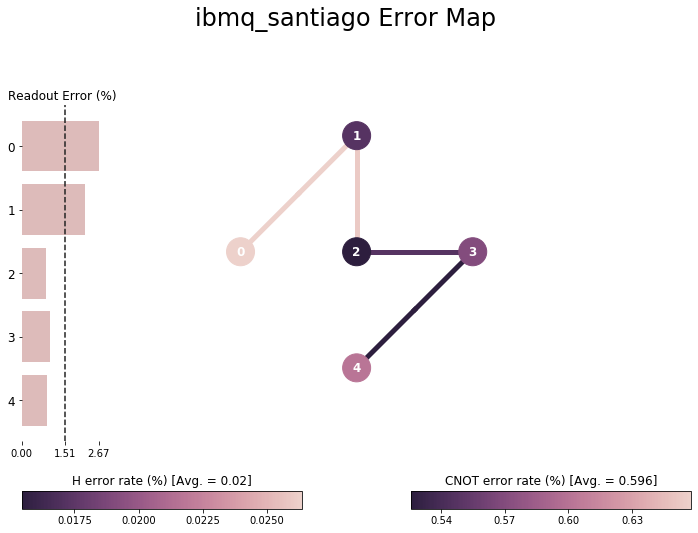

In [6]:
plot_error_map(backend)

# Coin flip simulation

We need just one qubit which after measurement will give either 0 or 1.

In [7]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

Hadamard gate does what we need as it introduces superposition with equal participation of $|0>$ and $|1>$

In [8]:
circuit.h(qr)
circuit.measure(qr, cr)

Let's use simulator to get the results quicker. However for really random numbers (REALLY!) we need real backend - used in exactly analogical way, just replace ```backend_simulator``` with ```backend``` in the ```execute()``` function below.

In [9]:
backend_simulator = Aer.get_backend('qasm_simulator')

In [15]:
job = execute(circuit, backend_simulator, shots=20, memory=True)

Note that using ```memory=True``` we get access to results of individual shots.

In [11]:
data = job.result().get_memory()
print(data)

['1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0']


In [16]:
counts = job.result().get_counts()
print(counts)

{'0': 10, '1': 10}


# Useful links to continue with Qiskit:
* [Official Qiskit web page](https://qiskit.org/)
* [Qiskit github project - with many tutorials](https://github.com/qiskit)
* [Qiskit learning materials](https://qiskit.org/learn/)
